# Real-Time Flood Depth Monitoring Using NYC Flood Sense Sensor Data

## Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# Load the dataset
df = pd.read_csv(r"Floodnet-data-export.csv")
df.head()

c:\users\rasagna\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,time,bw_hz,sensor_name,sf,batt_v,depth_filt_mm,depth_proc_mm,depth_raw_mm,dist_mm,f_cnt,gw_1_rssi_dbm,gw_1_snr_db,lora_freq_hz,night_median_dist_mm,data_rate,airtime_s
0,2020-10-05 04:01:07.896846+00:00,NaN,Hoyt and 5th,NaN,4.215,0.0,0.0,-1.0,2700.0,496,NaN,NaN,904100000.0,2699.0,SF9BW125,0.185344
1,2020-10-05 04:05:18.214146+00:00,NaN,Hoyt and 5th,NaN,4.215,0.0,0.0,-1.0,2700.0,497,NaN,NaN,904300000.0,2699.0,SF9BW125,0.185344
2,2020-10-05 04:09:28.521927+00:00,NaN,Hoyt and 5th,NaN,4.215,0.0,0.0,-1.0,2700.0,498,NaN,NaN,904900000.0,2699.0,SF9BW125,0.185344
3,2020-10-05 04:13:38.809402+00:00,NaN,Hoyt and 5th,NaN,4.221,0.0,0.0,-1.0,2700.0,499,NaN,NaN,905100000.0,2699.0,SF9BW125,0.185344
4,2020-10-05 04:17:49.125979+00:00,NaN,Hoyt and 5th,NaN,4.215,0.0,0.0,-3.0,2702.0,500,NaN,NaN,905300000.0,2699.0,SF9BW125,0.185344


In [16]:
# Drop irrelevant columns & keep useful features
features = ['bw_hz', 'sf', 'batt_v', 'depth_raw_mm', 'depth_proc_mm', 'gw_1_rssi_dbm', 'gw_1_snr_db']
target = 'depth_filt_mm'

In [17]:
# Drop rows with missing values in the selected features
df = df.dropna(subset=features + [target])
df

,time,bw_hz,sensor_name,sf,batt_v,depth_filt_mm,depth_proc_mm,depth_raw_mm,dist_mm,f_cnt,gw_1_rssi_dbm,gw_1_snr_db,lora_freq_hz,night_median_dist_mm,data_rate,airtime_s
371637,2021-07-16 04:01:07.196905+00:00,125000.0,Carroll and 4th,10.0,4.105,0.0,0.0,0.0,2824.0,3458,-109.0,-9.80,904900000.0,2824.0,NaN,NaN
371640,2021-07-16 04:02:02.950584+00:00,125000.0,Smith 9th,10.0,4.131,0.0,0.0,1.0,3026.0,3454,-81.0,11.00,904900000.0,3027.0,NaN,NaN
371645,2021-07-16 04:06:16.401662+00:00,125000.0,Carroll and 4th,10.0,4.112,0.0,0.0,1.0,2823.0,3459,-88.0,-4.80,905100000.0,2824.0,NaN,NaN
371648,2021-07-16 04:07:10.824829+00:00,125000.0,Smith 9th,10.0,4.131,0.0,0.0,-1.0,3028.0,3455,-100.0,-15.75,905100000.0,3027.0,NaN,NaN
371655,2021-07-16 04:12:18.607895+00:00,125000.0,Smith 9th,10.0,4.125,0.0,0.0,-1.0,3028.0,3456,-80.0,12.50,904900000.0,3027.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,2021-12-09 04:04:25.577945+00:00,125000.0,Davenport Ct.,7.0,4.100,0.0,0.0,-10.0,2632.0,28492,-78.0,9.00,905300000.0,2622.0,NaN,NaN
1048571,2021-12-09 04:04:27.661602+00:00,125000.0,Carroll and 4th,7.0,4.120,0.0,0.0,0.0,2772.0,29363,-121.0,-5.25,903900000.0,2772.0,NaN,NaN
1048572,2021-12-09 04:04:48.764671+00:00,125000.0,Hoyt and 5th,7.0,4.126,0.0,0.0,0.0,2632.0,29369,-105.0,2.25,905100000.0,2632.0,NaN,NaN
1048573,2021-12-09 04:04:54.726544+00:00,125000.0,Smith 9th,10.0,3.854,0.0,0.0,-5.0,3050.0,43857,-114.0,2.25,904500000.0,3045.0,NaN,NaN


c:\users\rasagna\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


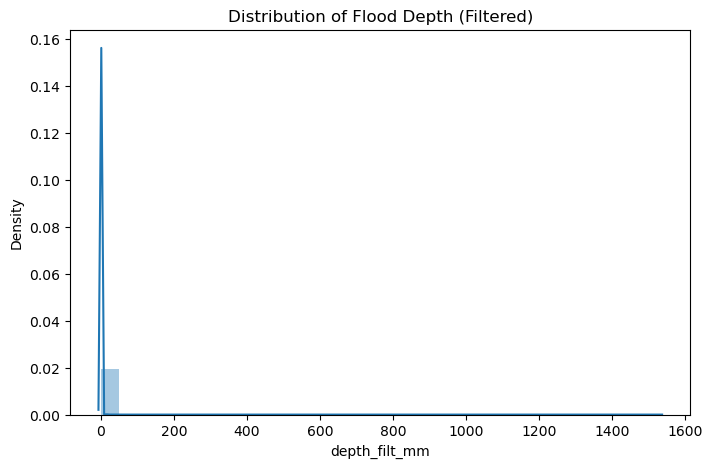

In [18]:
# EDA - Visualizing the target variable
plt.figure(figsize=(8,5))
sns.distplot(df[target], bins=30, kde=True)
plt.title("Distribution of Flood Depth (Filtered)")
plt.show()

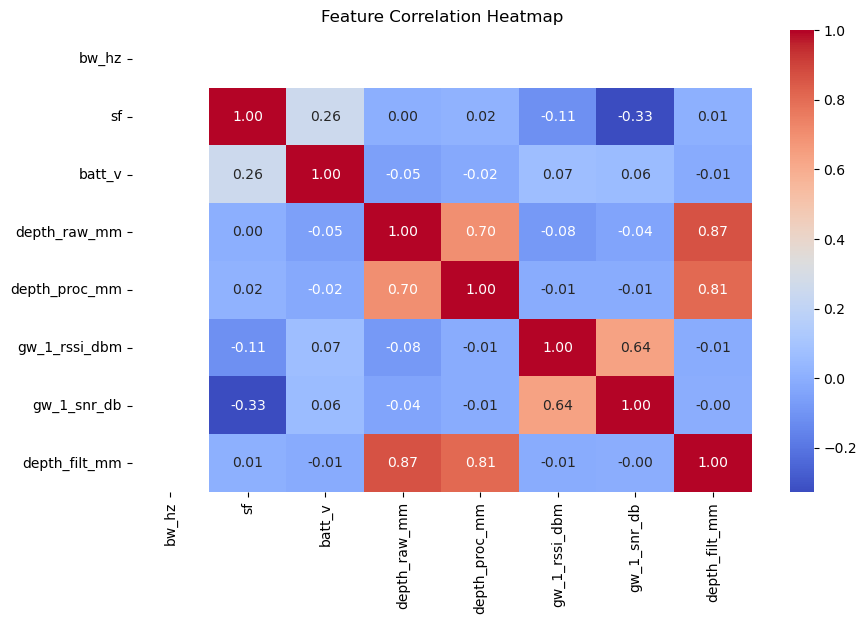

In [19]:
# EDA - Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Split dataset into train and test
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Define empty lists to store metrics
mse_list = []
mae_list = []
r2_list = []
# Function to calculate various metrics such as accuracy, precision etc
def calculatemetrics(algorithm, predict, testY):
    #testY = testY.astype('int')
    #predict = predict.astype('int')
    
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict) * 100
    
    # Append calculated metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print(algorithm + ' Mean Squared Error: ' + str(mse))
    print(algorithm + ' Mean Absolute Error: ' + str(mae))
    print(algorithm + ' R^2 Score: ' + str(r2))
    
    # Ensure that you are working with numpy arrays
    testY = np.array(testY)
    predict = np.array(predict)

    # Create a scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(predict, testY,color='blue')
    plt.plot([np.min(testY), np.max(testY)], [np.min(testY), np.max(testY)], linestyle='--', color='red', lw=2)
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Performance')
    plt.show()


Model loaded successfully.
Linear Regression Mean Squared Error: 107.33348859728558
Linear Regression Mean Absolute Error: 3.584742359929941
Linear Regression R^2 Score: 85.22144778786898


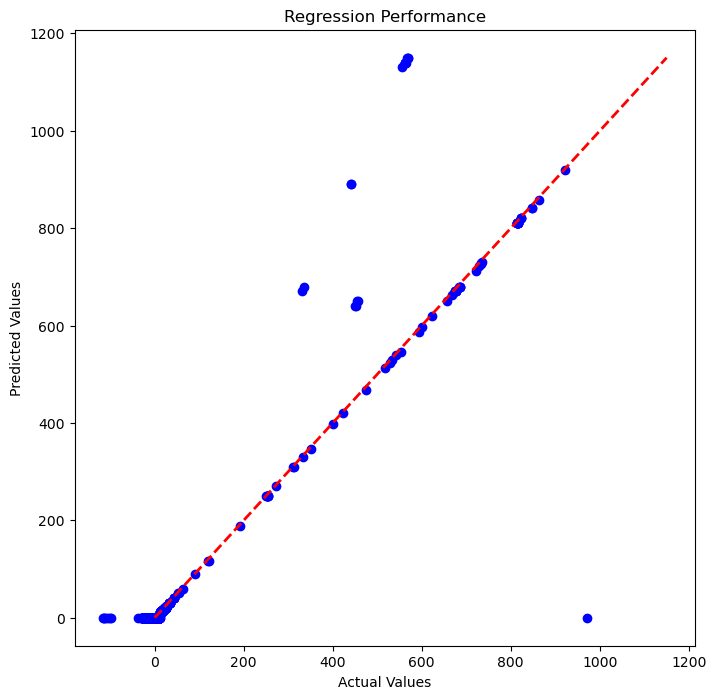

In [23]:
from sklearn.linear_model import LinearRegression
import os, joblib
modelfile = 'model/LR.pkl'  # Updated model file for regression
if os.path.exists(modelfile):
    # Load the trained model from the file
    model = joblib.load(modelfile)
    print("Model loaded successfully.")
    predict = model.predict(X_test)
    calculatemetrics("Linear Regression", predict, y_test)
else:
    # Initialize and train the Gradient Boosting Regressor model
    model = LinearRegression()  # Use the regressor version
    model.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(model, modelfile) 
    print("Model saved successfully.")
    predict = model.predict(X_test)
    calculatemetrics("Linear Regression", predict, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = 'random_forest_regressor22.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    random_forest_regressor = joblib.load(model)
    predict = random_forest_regressor.predict(X_test)
    calculatemetrics("Random Forest Regressor", predict, y_test)
else:
    random_forest_regressor = RandomForestRegressor()
    # Train the regressor on the training data
    random_forest_regressor.fit(X_train, y_train)
    # Make predictions on the test data
    predict = random_forest_regressor.predict(X_test)
    joblib.dump(random_forest_regressor, model)
    print("Random Forest Regressor trained and model weights saved.")
    calculatemetrics("Random Forest Regressor", predict, y_test)

In [ ]:
samp = X.sample(10)
samp

In [ ]:
samp2 = y.head(10)
samp2

In [ ]:
#samp.to_csv('testdata.csv')

In [ ]:
testdata = pd.read_csv('testdata.csv')
testdata

In [ ]:
pred  = random_forest_regressor.predict(testdata)
pred

In [ ]:
testdata['Prediction'] = pred
testdata